# 神经网络的数学基础

数学概念：张量、张量运算、微分、梯度下降。

## 构建一个数字识别的神经网络

In [1]:
from keras.datasets import mnist

# 训练集: train_images,train_labels
# 测试集：test_images,test_labels
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# 获得一些输入的信息
print(train_images.shape
print(len(train_images))
print(train_labels)

SyntaxError: invalid syntax (<ipython-input-2-daa94cad9cfa>, line 3)

In [7]:
# 构建模型
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape = (28*28,)))
network.add(layers.Dense(10,activation='softmax'))

#  损失函数（loss function）
#  优化器（optimizer）

# 需要监控的指标（metric）
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [3]:
#准备数据
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255



In [4]:
# 准备标签数据
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)




In [9]:
# 训练模型
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2559 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.1034 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0680 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0501 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.0381 - acc: 0.9885


In [10]:
# 测试模型
test_loss,test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

10000/10000 [==============================] - 0s 36us/step
test_acc: 0.9796


## 深度学习中的数据概念

### 张量

#### 常见的张量类型
**张量：** 它是一个数据容器，模型中最基本的数据结构，比如，矩阵（2维张量）

**标量（0D张量）**
标量： 仅仅包含一个数字的张量（标量张量，零维张量，0D张量）在 Numpy中，一个 float32 或 float64 的数字,可以通过ndim属性来查询轴的个数。  

**向量（1D张量）**
向量：数字组成的数组，只有一维，一个轴  

**矩阵（2D 张量）**
由向量组成的数组叫矩阵，只有二维，两个轴
第一个轴上的元素叫作行（row），第二个轴上的元素叫作列（column）  

**3D 张量与更高维张量**
将多个矩阵组合成一个新的数组，可以得到一个 3D 张量,直观地理解为数字组成的立方体,深度学习处理的一般是 0D 到 4D 的张量，但处理视频数据时可能会遇到 5D 张量。


In [6]:
# 标量（0D张量）
import numpy as np
x  = np.array(12)
print(x)
print(x.ndim)

# 向量（1D张量）
x = np.array([12,3,6,12,1])
 # 5D向量
print(x)
print(x.ndim)

#矩阵（2D 张量）
x = np.array([[12,3,6,12,1],
            [8,12,23,34,1]])
print(x)
print(x.ndim)

#3D 张量与更高维张量

x = np.array([[[12,3,6,12,1],
            [8,12,23,34,1]],
              [[12,3,6,12,1],
            [8,12,23,34,1]]])
print(x)
print(x.ndim)


12
0
[12  3  6 12  1]
1
[[12  3  6 12  1]
 [ 8 12 23 34  1]]
2
[[[12  3  6 12  1]
  [ 8 12 23 34  1]]

 [[12  3  6 12  1]
  [ 8 12 23 34  1]]]
3


#### 张量类型的关键属性

**轴的个数（阶数）** 3D 张量有 3 个轴，矩阵有 2 个轴。这在 Numpy 等 Python 库中也叫张量的 ndim  
**形状** 这是一个整数元组，表示张量沿每个轴的维度大小（元素个数）。前面矩阵示例的形状为 (3,  5)，3D 张量示例的形状为 (3,  3,  5)  
**数据类型** 这是张量中所包含数据的类型，例如，张量的类型可以是 float32、uint8、float64 等。

3
(60000, 28, 28)
uint8


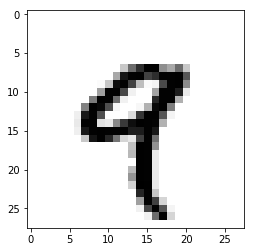

In [7]:
# mnist数据的格式
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# 轴的个数，阶数
print(train_images.ndim)

# 形状
print(train_images.shape)

# 数据类型
print(train_images.dtype)

# 利用Matplotlib来显示3D数据
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

#### numpy中操作张量

**张量切片**  
选择张量的特定元素,
选择单个样本：train_images[4]
选择多个样本：train_images[10:100]


#### 批量数据（batch）

深度学习中所有数据张量的第一个轴（0 轴，因为索引从 0 开始）都是样本轴（samples axis，有时也叫样本维度）。

**mini batch**
深度学习模型不会同时处理整个数据集，而是将数据拆分成小批量(mini batch)
```python
batch = train_images[:128]
batch = train_images[128:256]
batch = train_images[128 * n:128 * (n + 1)]

```
这是一种常见的处理数据的方法，如下就用到了该方法，每次训练的时候，使用128个样本数据进行训练
`network.fit(train_images,train_labels,epochs=5,batch_size=128)`
`batch_size=128`:128个样本数据进行一次迭代
第一个轴（0 轴）叫作批量轴（batch axis）或批量维度（batch dimension）

#### 常用的数据张量

- 向量数据：2D 张量，形状为 (samples, features)。
- 时间序列数据或序列数据：3D 张量，形状为 (samples, timesteps, features)。
- 图像：4D 张量，形状为 (samples, height, width, channels) 或 (samples, channels, height, width)。
- 视频：5D 张量，形状为 (samples, frames, height, width, channels) 或 (samples, frames, channels, height, width)。
 
 **向量数据2D**  
 其中第一个轴是样本轴，第二个轴是特征轴，例如人口统计数据集，其中包括每个人的年龄、邮编和收入，。每个人可以表示为包含 3 个值的向量，100个人可以写成(100，3)。
 
 **时间序列数据或序列数据3D**  
 当时间（或序列顺序）对于数据很重要时，应该将数据存储在带有时间轴的 3D 张量中.
 
 ![时间序列数据](imgs/01.jpg)
 
 **图像数据4D**
 图像通常具有三个维度：高度、宽度和颜色深度，加上批量的数据
 ![图像数据](imgs/02.jpg)
 
通道在后（channels-last）的约定（在 TensorFlow 中使用）和通道在前（channels-first）的约定（在 Theano 中使用）。  

**视频数据5D**
视频可以看作一系列帧，每一帧都是一张彩色图像。由于每一帧都可以保存在一个形状为 (height,  width,  color_
depth) 的 3D 张量中,，因此一系列帧可以保存在一个形状为 (frames,  height,  width, color_depth) 的 4D 张量中,而不同视频组成的批量则可以保存在一个 5D 张量中，其形状为(samples, frames, height, width, color_depth)。


In [8]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


## 张量运算（tensor operation）

深度神经网络学到的所有**变换**也都可以简化为数值数据张量上的一些**张量运算**。
例如：
`keras.layers.Dense(512, activation='relu')`: `output = relu(dot(W, input) + b)`

### element-wise向量元素的运算 

该运算独立地应用于张量中的每个元素，也就是说，这些运算非常适合大规模并行实现。利用numpy 可以很方便实现向量之间的元素的运算。


In [20]:
import numpy as np

def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x


def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

x = np.array([[1,2],[3,-1],[0,2]])
y = np.array([[1,3],[3,-1],[1,2]])
x = naive_relu(x)
z = naive_add(x,y)
print('x:\n',x)
print('z:\n',z)

x:
 [[1 2]
 [3 0]
 [0 2]]
z:
 [[ 2  5]
 [ 6 -1]
 [ 1  4]]


### 广播

**广播：**用来实现两个shpae不一样的张量相加。
广播实现的步骤：

1.  向较小的张量添加轴（叫作广播轴），使其 ndim 与较大的张量相同。
2.  将较小的张量沿着新轴重复，使其形状与较大的张量相同。

例如：x(32,10), y(10,) 当计算：x+y时
- 首先，给y添加一个轴，(1,10)
- 然后，将y沿着新轴重复32次，变成(32,10)





In [21]:
import numpy as np

x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x,y)
print(z)

[[[[0.71013667 0.82969657 0.78225567 ... 0.39605762 0.42966385
    0.61052148]
   [0.9049391  0.46614795 0.73385268 ... 0.20526913 0.98638954
    0.42001967]
   [0.93415511 0.48489238 0.99644995 ... 0.70673411 0.25367595
    0.90680967]
   ...
   [0.68584807 0.68216775 0.89673641 ... 0.56895128 0.49229177
    0.44828955]
   [0.73031078 0.46058138 0.95667398 ... 0.67178032 0.90309872
    0.59926792]
   [0.84352022 0.74051926 0.77454756 ... 0.58415875 0.91026515
    0.61807189]]

  [[0.72373182 0.92052644 0.53989569 ... 0.78217932 0.64938267
    0.61052148]
   [0.4797875  0.37622719 0.73385268 ... 0.14582796 0.98638954
    0.45760632]
   [0.32746173 0.48489238 0.99644995 ... 0.70673411 0.82932879
    0.80697678]
   ...
   [0.70078964 0.68216775 0.87795427 ... 0.64020079 0.15883197
    0.57577238]
   [0.73031078 0.52780529 0.95667398 ... 0.67178032 0.27456767
    0.90407763]
   [0.84352022 0.55884451 0.19978928 ... 0.58415875 0.69673911
    0.61807189]]

  [[0.47315636 0.82969657 0.837469